# Geometry - Visualization

Here code examples for visualization options of geometry structures are given. For analysis and other properties, please refer to the corresponding example notebooks.

**NOTE**

[MayaVi](https://docs.enthought.com/mayavi/mayavi/) is needed for 3D structure visualizations discussed here, which is not included in the default dependency. The users are encouraged to install it according to their own needs.

## Basic structure visualization

In [1]:
from CRYSTALpytools.convert import cry_gui2pmg
from CRYSTALpytools.geometry import CStructure

cstruc = CStructure.from_pmg(cry_gui2pmg('geom_graphite.gui'))
cstruc.visualize()

Output:

<img src="./geom_graphite.png" width="320">

### `display_range`

The `display_range` keyword controls the display range of the structure along 3 lattice vectors. Fractional coordinates are used.

Display a 3\*3\*1 cell of graphite.

In [2]:
from CRYSTALpytools.convert import cry_gui2pmg
from CRYSTALpytools.geometry import CStructure

cstruc = CStructure.from_pmg(cry_gui2pmg('geom_graphite.gui'))
cstruc.visualize(display_range=[[0,3], [0,3], [0,1]])

Output:

<img src="./geom_graphite3x3.png" width="320">

`display_range` must be defined as `[min, max]`, otherwise error is reported.

### `display_matrix` and `display_origin`

`display_matrix` and `display_origin` keywords changes the structure (and of course the lattice) displayed. The following equation is used:

$$\mathbf{L} = \mathbf{M}\mathbf{L_{0}} + \mathbf{p}\mathbf{M}\mathbf{L_{0}}$$

where $\mathbf{L_{0}}=(\mathbf{a_{0}, b_{0}, c_{0}})^{T}$ is the lattice of `self`. $\mathbf{M}$ is the supercell matrix. $\mathbf{p}$ is the origin, which is defined as the fractional coordinates of the expanded supercell.

Both keywords changes the displayed structure only.

Display a 3\*3\*1 supercell of graphite.

In [3]:
from CRYSTALpytools.convert import cry_gui2pmg
from CRYSTALpytools.geometry import CStructure

cstruc = CStructure.from_pmg(cry_gui2pmg('geom_graphite.gui'))
cstruc.visualize(display_matrix=[[3,0,0], [0,3,0], [0,0,1]])

Output:

<img src="./geom_graphite3x3scel.png" width="320">

Compared to `display_range`, it differs by lattice. `display_matrix` **must be defined as the inter matrix with determinant > 1**, i.e., expansion only, otherwise error is given. `display_range` and `display_origin` can be defined by fractional numbers.

The following examples are for testing proposes by developers. The users are suggested to skip to the next section.

In [4]:
from CRYSTALpytools.convert import cry_gui2pmg
from CRYSTALpytools.geometry import CStructure

cstruc = CStructure.from_pmg(cry_gui2pmg('geom_hematite.gui'))
# hexagonal
cstruc.visualize(atom_bond_ratio='small', scale=1.0,
                 display_matrix=[[1, -1, 0], [0, 1, -1], [1, 1, 1]])

In [5]:
from CRYSTALpytools.convert import cry_gui2pmg
from CRYSTALpytools.geometry import CStructure

cstruc = CStructure.from_pmg(cry_gui2pmg('geom_hematite.gui'))
# trigonal
cstruc.visualize(atom_bond_ratio='small', scale=1.0)

In [6]:
from CRYSTALpytools.convert import cry_gui2pmg
from CRYSTALpytools.geometry import CStructure

cstruc = CStructure.from_pmg(cry_gui2pmg('geom_co2.gui'))
# co2 at body center
cstruc.visualize(display_origin=[0.5, 0.5, 0.5])

In [7]:
from CRYSTALpytools.convert import cry_gui2pmg
from CRYSTALpytools.geometry import CStructure

cstruc = CStructure.from_pmg(cry_gui2pmg('geom_co2.gui'))
# co2 at origin
cstruc.visualize()

In [8]:
from CRYSTALpytools.convert import cry_gui2pmg
from CRYSTALpytools.geometry import CStructure

cstruc = CStructure.from_pmg(cry_gui2pmg('geom_rippleG.gui'))
# A complete sheet. Default option split the sheet to the bottom and the top
cstruc.visualize(display_range=[[0,1], [0,1], [-0.05, 0.05]])

In [9]:
from CRYSTALpytools.convert import cry_gui2pmg
from CRYSTALpytools.geometry import CStructure

cstruc = CStructure.from_pmg(cry_gui2pmg('geom_rippleG.gui'))
# A very long cell (very small in default figure)
# Origin is in 250. A complete sheet around 500.
cstruc.visualize(display_origin=[0.5, 0.5, 0.5])

## Data visualization mode

The 3D structure visualization tool of CRYSTALpytools is featured by the data visualization mode, where the user can color atoms and bonds by defining the data associated to them. Here the rippled graphene in *J. Phys. Chem. C*, 2022, **126**, 19435–19445 is used as example.

### Atom data visualization

Distribution of z coordinates (rippling heights). Data are defined in the strucutre and duplicated in the supercell.

In [10]:
from CRYSTALpytools.convert import cry_gui2pmg
from CRYSTALpytools.geometry import CStructure
import numpy as np

cstruc = CStructure.from_pmg(cry_gui2pmg('geom_rippleG.gui'))
at_data = np.vstack([
    [i+1 for i in range(cstruc.num_sites)], # indices start from 1
    cstruc.cart_coords[:, 2]
]).T

cstruc.visualize(atom_data=at_data, atom_color='jet',
                 display_range=[[0,2], [0,2], [-0.05, 0.05]])

Output:

<img src="./geom_rippleG_atom.png" width="640">

Remove data of atom 1~10. Use `atom_null` to set the color of atoms without data.

In [16]:
from CRYSTALpytools.convert import cry_gui2pmg
from CRYSTALpytools.geometry import CStructure
import numpy as np

cstruc = CStructure.from_pmg(cry_gui2pmg('geom_rippleG.gui'))
at_data = np.vstack([
    [i+1 for i in range(cstruc.num_sites)], # indices start from 1
    cstruc.cart_coords[:, 2]
]).T

cstruc.visualize(atom_data=at_data[10:], atom_color='winter', atom_null=(1,0,0),
                 display_range=[[0,2], [0,2], [-0.05, 0.05]])

Atoms without data are plotted in red, which is not present in colormap.

<img src="./geom_rippleG_atomNull.png" width="640">

### Bond data visualization

Distribution of bond lengthes. Data are defined in the strucutre and duplicated in the supercell.

**NOTE**

Due to the settings of MayaVi, bonds in data display mode are plotted as 'lines' rather than 'tubes', which means the colored bonds might look very thick in small rendering windows. The solution is to zoom in and to expand the window, ideally using the full-screen mode.

In [11]:
from CRYSTALpytools.convert import cry_gui2pmg
from CRYSTALpytools.geometry import CStructure
import numpy as np

cstruc = CStructure.from_pmg(cry_gui2pmg('geom_rippleG.gui'))

cstruc.get_bonds()
bd_data = []
for b in cstruc.bonds:
    bdlen = np.linalg.norm(
        cstruc.frac_coords[b[0]-1]@cstruc.lattice.matrix - \
        (cstruc.frac_coords[b[1]-1]+b[2])@cstruc.lattice.matrix
    )
    bd_data.append([b[0], b[1], bdlen]) # atom indices from 1

cstruc.visualize(atom_bond_ratio='sticks',
                 bond_color='jet',
                 bond_data=bd_data,
                 display_range=[[0,2], [0,2], [-0.05, 0.05]],
                 display_origin=[0.5, 0.5, 0.])

Output:

<img src="./geom_rippleG_bond.png" width="640">

### Atom and bond data visualization

Visualizing ripple hight and bond length together. Note that here `display_matrix` rather than `display_range` is used. Expansions are made along periodic directions only.

In [12]:
from CRYSTALpytools.convert import cry_gui2pmg
from CRYSTALpytools.geometry import CStructure
import numpy as np

cstruc = CStructure.from_pmg(cry_gui2pmg('geom_rippleG.gui'))

at_data = np.vstack([
    [i+1 for i in range(cstruc.num_sites)], # indices start from 1
    cstruc.cart_coords[:, 2]
]).T

cstruc.get_bonds()
bd_data = []
for b in cstruc.bonds:
    bdlen = np.linalg.norm(
        cstruc.frac_coords[b[0]-1]@cstruc.lattice.matrix - \
        (cstruc.frac_coords[b[1]-1]+b[2])@cstruc.lattice.matrix
    )
    bd_data.append([b[0], b[1], bdlen]) # atom indices from 1

cstruc.visualize(atom_bond_ratio='small',
                 atom_color='jet',
                 atom_data=at_data,
                 bond_color='jet',
                 bond_data=bd_data,
                 display_range=[[0,1], [0,1], [-0.05, 0.05]],
                 display_matrix=np.eye(3)*2,
                 display_origin=[0.5, 0.5, 0.])

(-0.5, 1919.5, 1917.5, -0.5)

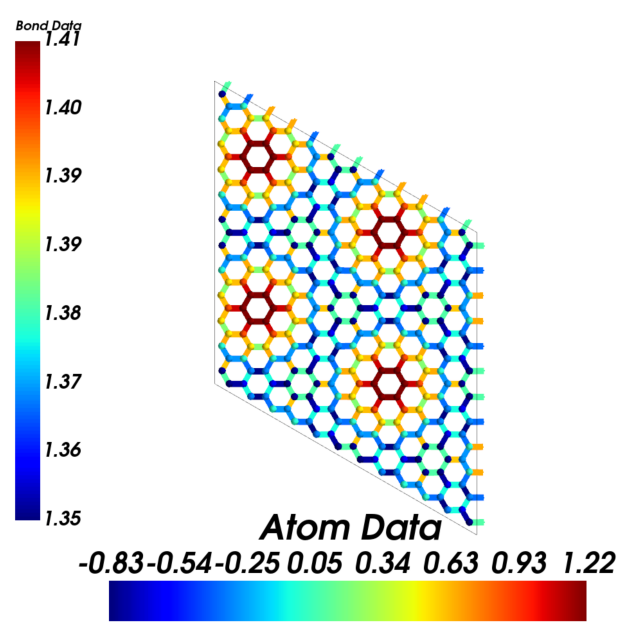

In [15]:
# This code block is only used to generate a nice thumbnail for the example gallary.
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=[8,8])
ax.imshow(plt.imread("./geom_rippleG_both.png"))
ax.axis('off')

For more details, please refer to the [API documentations](https://crystal-code-tools.github.io/CRYSTALpytools/crystalpytools.geometry.html).